In [2]:
import numpy as np
from matplotlib import pyplot as plt
import bottleneck as bn
import pickle


dict_keys(['features', 'feature_sequence', 'actions', 'rewards', 'carry', 'next_features', 'next_carry', 'action_sequence', 'killed', 'occupancy_map', 'next_occupancy_map'])
0.2644526


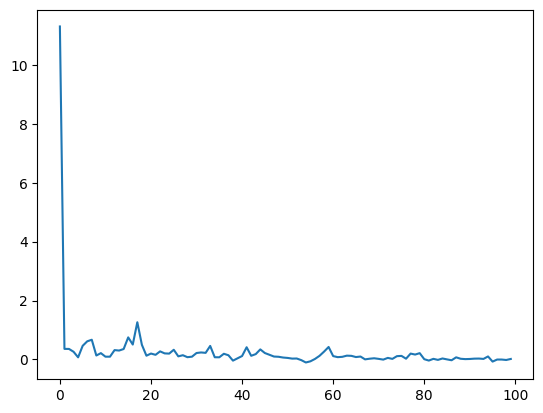

In [3]:

data = np.load("training_data/trajectory_MappingTask_episode_5.pkl", allow_pickle=True)

print(data.keys())
rewards = data["rewards"]
rewards = np.array(rewards)

print(np.mean(rewards))
plt.plot(rewards)
move_mean = bn.move_mean(rewards, window=100)
plt.plot(move_mean)


(100, 2)


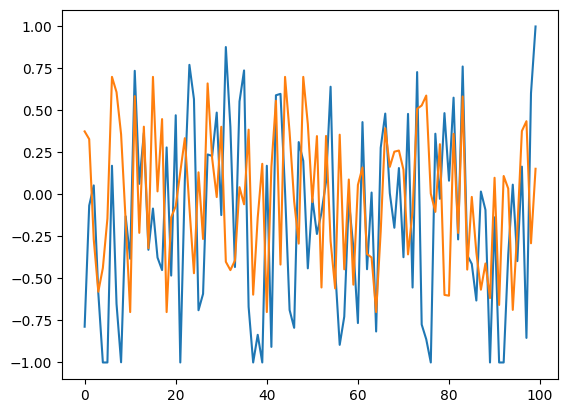

In [4]:
actions = data["actions"]
actions = np.array(actions)
print(actions.shape)
plt.plot(actions[:, 0], label="grad_x")
plt.plot(actions[:, 1], label="grad_y")

(41, 3)


Text(0.5, 1.0, 'temperature')

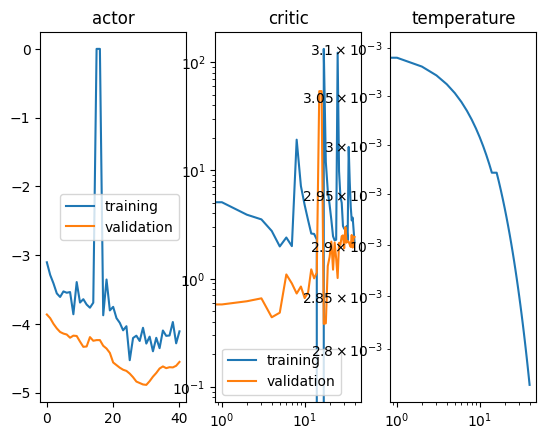

In [5]:

import numpy as np
from matplotlib import pyplot as plt
training_losses = np.load("training_losses.npy", allow_pickle=True)
validation_losses = np.load("validation_losses.npy", allow_pickle=True)
temperature = np.load("temperature_history.npy", allow_pickle=True)
print(training_losses.shape)
fig, ax = plt.subplots(1,3)
ax[0].plot(training_losses[:,0], label="training")
ax[0].plot(validation_losses[:,0], label="validation")
ax[0].set_title("actor")
ax[0].legend()

ax[1].loglog(training_losses[:,1], label="training")
ax[1].loglog(validation_losses[:,1], label="validation")
ax[1].set_title("critic")
ax[1].legend()
ax[2].loglog(temperature)
ax[2].set_title("temperature")